In [63]:
import pandas as pd


df = pd.read_csv('cleaned_dataset.csv')



In [ ]:
#Printing df informations
print(df.info())

In [71]:
#Removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_without_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f'{len(df) - len(df_without_outliers)} rows have been removed from the {column} column')
    return df_without_outliers
df_without_outliers = remove_outliers(df, 'price')
df_without_outliers = remove_outliers(df_without_outliers, 'livingArea')


df = df_without_outliers


0 rows have been removed from the price column
0 rows have been removed from the livingArea column


In [72]:
#Creating new binary columns for subtype of property and buildingstate
df['APARTMENT_BLOCK'] = (df['property_subtype'] == 'APARTMENT_BLOCK').astype(int)
df['GROUND_FLOOR'] = (df['property_subtype'] == 'GROUND_FLOOR').astype(int)
df['COUNTRY_COTTAGE'] = (df['property_subtype'] == 'COUNTRY_COTTAGE').astype(int)
df['MANSION'] = (df['property_subtype'] == 'MANSION').astype(int)
df['PENTHOUSE'] = (df['property_subtype'] == 'PENTHOUSE').astype(int)
df['EXCEPTIONAL_PROPERTY'] = (df['property_subtype'] == 'EXCEPTIONAL_PROPERTY').astype(int)
df['KOT'] = (df['property_subtype'] == 'KOT').astype(int)
df['LOFT'] = (df['property_subtype'] == 'LOFT').astype(int)
df['MANOR_HOUSE'] = (df['property_subtype'] == 'MANOR_HOUSE').astype(int)
df['SERVICE_FLAT'] = (df['property_subtype'] == 'SERVICE_FLAT').astype(int)
df['CHALET'] = (df['property_subtype'] == 'CHALET').astype(int)


df['AS_NEW'] = (df['buildingState'] == 'AS_NEW').astype(int)
df['GOOD'] = (df['buildingState'] == 'GOOD').astype(int)
df['JUST_RENOVATED'] = (df['buildingState'] == 'JUST_RENOVATED').astype(int)
df['TO_BE_DONE_UP'] = (df['buildingState'] == 'TO_BE_DONE_UP').astype(int)
df['TO_RENOVATE'] = (df['buildingState'] == 'TO_RENOVATE').astype(int)
df['TO_RESTORE'] = (df['buildingState'] == 'TO_RESTORE').astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11226 entries, 0 to 16101
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   house_index           11226 non-null  int64  
 1   bedrooms              11226 non-null  int64  
 2   property_type         11226 non-null  object 
 3   property_subtype      11226 non-null  object 
 4   locality              11226 non-null  object 
 5   postal_code           11226 non-null  object 
 6   street                10991 non-null  object 
 7   number                10902 non-null  object 
 8   box                   3932 non-null   object 
 9   kitchen               11226 non-null  int64  
 10  facades               8040 non-null   float64
 11  price                 11226 non-null  float64
 12  furnished             11226 non-null  int64  
 13  terrace               11226 non-null  int64  
 14  terraceSurface        8095 non-null   float64
 15  fireplace             11

average % of missing values in price column is 0.0
average % of missing values in bedrooms column is 0.0
average % of missing values in property_type column is 0.0
average % of missing values in property_subtype column is 0.0
average % of missing values in locality column is 0.0
average % of missing values in postal_code column is 0.0
average % of missing values in street column is 2.093354712275076
average % of missing values in kitchen column is 0.0
average % of missing values in facades column is 28.380545163014432
average % of missing values in furnished column is 0.0
average % of missing values in terrace column is 0.0
average % of missing values in terraceSurface column is 27.890611081418136
average % of missing values in fireplace column is 0.0
average % of missing values in fireplaceCount column is 0.0
average % of missing values in buildingState column is 17.08533760912168
average % of missing values in garden column is 0.0
average % of missing values in gardenSurface column i

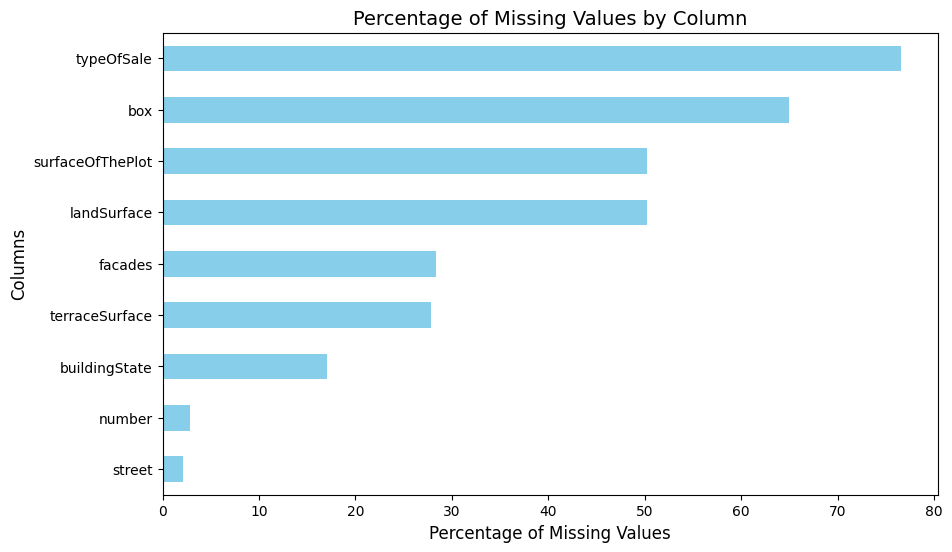

In [73]:
#Average % of missing values per column
import matplotlib.pyplot as plt
def avg_missing_values(df, column):
    print(f'average % of missing values in {column} column is {(df[column].isna().sum() / len(df[column])) * 100}')
    return (df[column].isna().sum() / len(df[column])) * 100
avg_missing_values(df, 'price')
avg_missing_values(df, 'bedrooms')
avg_missing_values(df, 'property_type')
avg_missing_values(df, 'property_subtype')
avg_missing_values(df, 'locality')
avg_missing_values(df, 'postal_code')
avg_missing_values(df, 'street')
avg_missing_values(df, 'kitchen')
avg_missing_values(df, 'facades')
avg_missing_values(df, 'furnished')
avg_missing_values(df, 'terrace')
avg_missing_values(df, 'terraceSurface')
avg_missing_values(df, 'fireplace')
avg_missing_values(df, 'fireplaceCount')
avg_missing_values(df, 'buildingState')
avg_missing_values(df, 'garden')
avg_missing_values(df, 'gardenSurface')
avg_missing_values(df, 'pool')
avg_missing_values(df, 'landSurface')
avg_missing_values(df, 'livingArea')


missing_percent = df.isna().mean() * 100

missing_percent = missing_percent[missing_percent > 0]


plt.figure(figsize=(10, 6))
missing_percent.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values by Column', fontsize=14)
plt.xlabel('Percentage of Missing Values', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.show()

In [74]:
#Checking correlation with price
df_numeric = df.select_dtypes(include=['float64', 'int64']) 

correlation_matrix = df_numeric.corr()
print(correlation_matrix['price'].sort_values(ascending=False))

price                   1.000000
livingArea              0.508650
bedrooms                0.415832
facades                 0.245374
AS_NEW                  0.159676
house_index             0.153162
terrace                 0.137169
surfaceOfThePlot        0.124716
landSurface             0.124716
garden                  0.122989
fireplace               0.118903
PENTHOUSE               0.079002
pool                    0.065781
EXCEPTIONAL_PROPERTY    0.057624
terraceSurface          0.052951
gardenSurface           0.044310
APARTMENT_BLOCK         0.042038
LOFT                    0.041917
COUNTRY_COTTAGE         0.022659
MANSION                 0.020664
JUST_RENOVATED          0.015609
kitchen                 0.012182
fireplaceCount          0.012043
MANOR_HOUSE            -0.000439
GOOD                   -0.012852
TO_RESTORE             -0.028586
furnished              -0.035272
CHALET                 -0.047608
GROUND_FLOOR           -0.048563
SERVICE_FLAT           -0.048632
KOT       

object
object


(np.float64(8763.493630001693),
 np.float64(299782.5311700009),
 np.float64(10018.970644998364),
 np.float64(255170.46085500065))

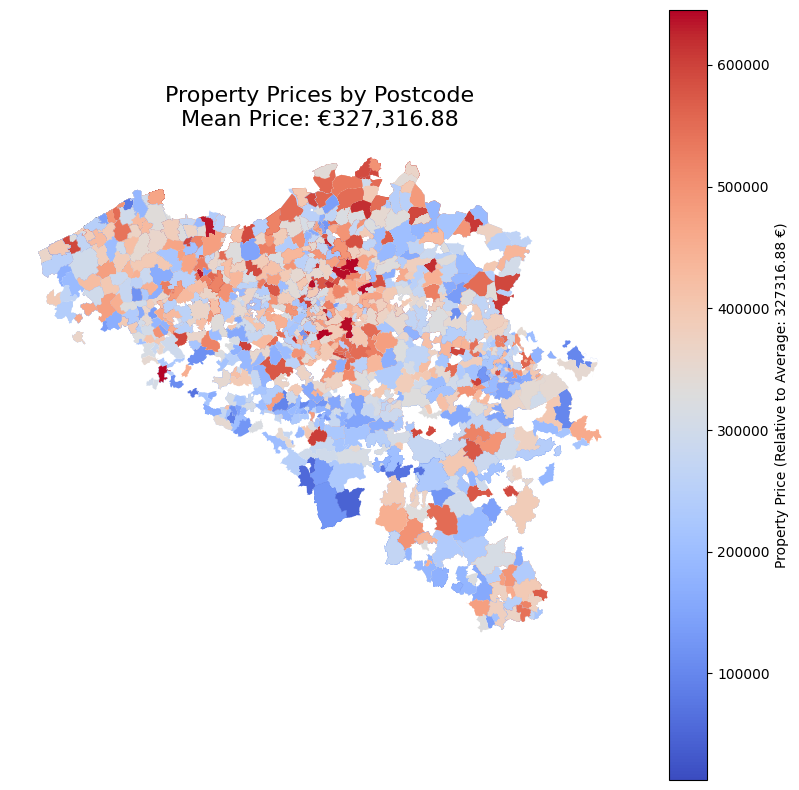

In [75]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.read_file("postaldistricts.shp")
# Check data types for 'postal_code' in df and 'nouveau_PO' in gdf
print(df['postal_code'].dtype)  # Check type in df
print(gdf['nouveau_PO'].dtype)  # Check type in gdf

df['postal_code'] = df['postal_code'].astype(str)
gdf['nouveau_PO'] = gdf['nouveau_PO'].astype(str)

gdf = gdf.merge(df[['postal_code', 'price', 'livingArea']], 
                 left_on='nouveau_PO', 
                 right_on='postal_code', 
                 how='left')
# Calculate the average price after filtering out outliers (assuming you've filtered outliers in 'average_price_filtered')
average_price_filtered = gdf['price'].mean()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {average_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None
)

# Add a title
plt.title(f"Property Prices by Postcode\nMean Price: €{average_price_filtered:,.2f}", fontsize=16)
plt.axis('off')



(np.float64(8763.493630001693),
 np.float64(299782.5311700009),
 np.float64(10018.970644998364),
 np.float64(255170.46085500065))

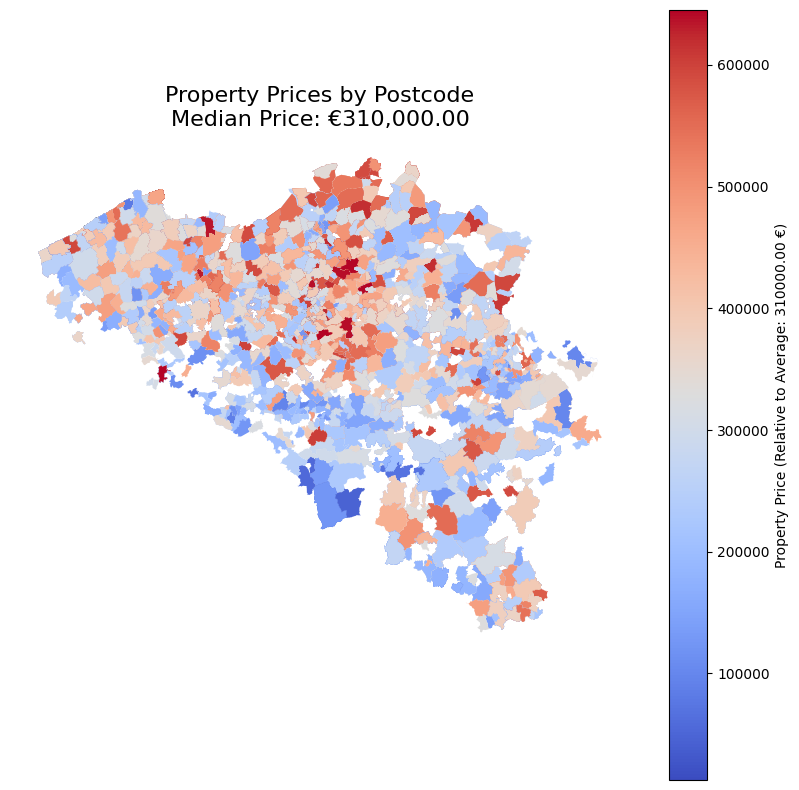

In [76]:
average_price_filtered_median = gdf['price'].median()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {average_price_filtered_median:.2f} €)"},
    ax=ax, 
    edgecolor=None
)

# Add a title
plt.title(f"Property Prices by Postcode\nMedian Price: €{average_price_filtered_median:,.2f}", fontsize=16)
plt.axis('off')

(np.float64(8763.493630001693),
 np.float64(299782.5311700009),
 np.float64(10018.970644998364),
 np.float64(255170.46085500065))

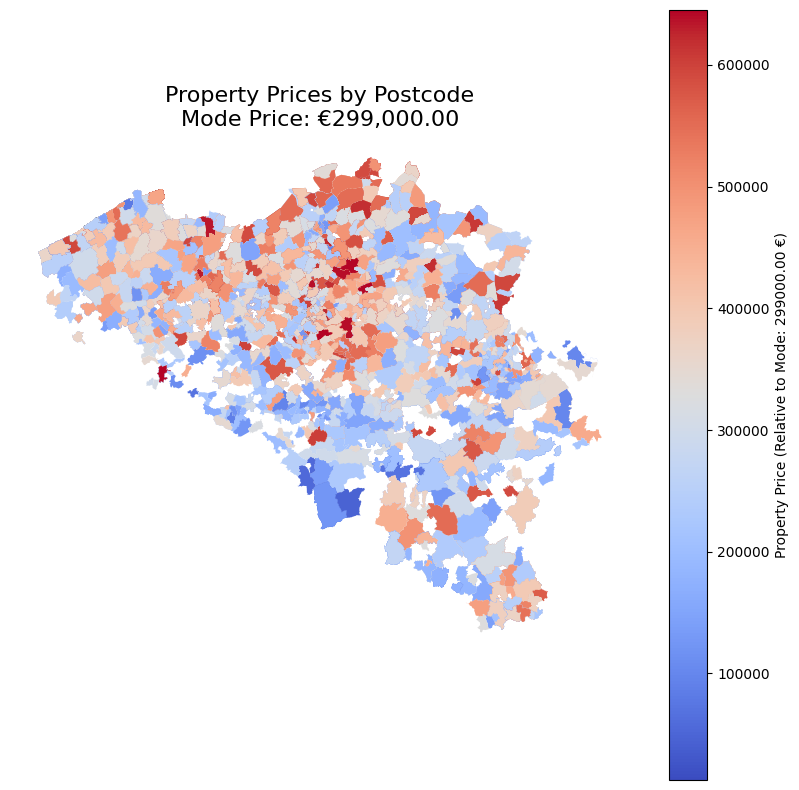

In [77]:
average_price_filtered_mode = gdf['price'].mode()[0]

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Mode: {average_price_filtered_mode:.2f} €)"},
    ax=ax, 
    edgecolor=None
)

# Add a title
plt.title(f"Property Prices by Postcode\nMode Price: €{average_price_filtered_mode:,.2f}", fontsize=16)
plt.axis('off')

(np.float64(8763.493630001693),
 np.float64(299782.5311700009),
 np.float64(10018.970644998364),
 np.float64(255170.46085500065))

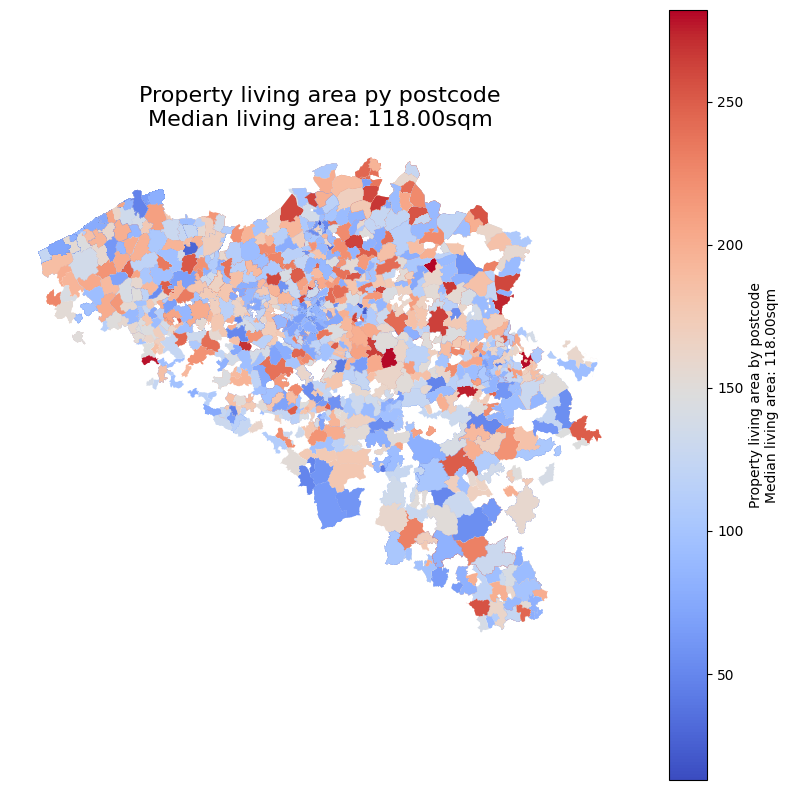

In [78]:
average_livingarea_filtered_median = gdf['livingArea'].median()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='livingArea', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property living area by postcode\nMedian living area: {average_livingarea_filtered_median:,.2f}sqm"},
    ax=ax, 
    edgecolor=None
)

# Add a title
plt.title(f"Property living area py postcode\nMedian living area: {average_livingarea_filtered_median:,.2f}sqm", fontsize=16)
plt.axis('off')